In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Inicialización

El primer paso que vamos a realizar es cargar las dos tablas en dos data frames. 

In [2]:
df_volvera = pd.read_csv("tp-2020-2c-train-cols1.csv")
df_volvera

,id_usuario,volveria
0,117,0
1,658,0
2,794,0
3,455,0
4,173,1
...,...,...
796,448,1
797,636,1
798,848,0
799,304,1


In [3]:
df_usuario = pd.read_csv("tp-2020-2c-train-cols2.csv")
df_usuario

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes


En un primer analisis, podemos ver de ambas tablas poseen un total de 801 filas, teniendo ambas tablas igual cantidad de valores. 

Para hacer un join de las mismas, vamos a utilizar el campo `id_usuario` el cual es compartido.

Dejaremos en la variable `df_joined` las tablas unidas sin modificar, y usaremos `df` para ir realizando operaciones sobre la misma.

In [4]:
df_joined = df_usuario.join(df_volvera.set_index('id_usuario'), on='id_usuario', how='inner').set_index('id_usuario')
df = df_joined.copy()
df

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
id_usuario,,,,,,,,,,,
117,4d,Señor Camilo Pedro,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
794,normal,Señor Antonio Federico,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
455,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
173,4d,Señorita Rita Eudosia,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...
448,normal,Señor Bernardo Melesio,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
636,3d,Señorita Lidia Catalina,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
848,4d,Señor Arturo Antenor,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0


# Analisis de Datos

## Columnas con información duplicada

En este paso vamos a tratar de averiguar si tenemos información duplicada. El siguiente comando nos mostrara si existen respuestas exactamente iguales en la encuesta.

In [5]:
df[df.duplicated(keep=False)]

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
id_usuario,,,,,,,,,,,


Lo bueno de la verifcación anterior es que sabemos que no existio multiples respuestas exactamente iguales.

## Columnas con ausencia de información

El objetivo de este analisis es poder entender cuales son las columnas que poseen faltante de información.

In [6]:
simbols = ["-","","_"]
for c in simbols:
    print("Column has simbol: '",c,"'")
    print(df.astype('str').eq(c).any())

Column has simbol: ' - '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool
Column has simbol: '  '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool
Column has simbol: ' _ '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool


Viendo el resultado anterior, sabemos que no existen caracteres especiales que puedan representar la ausencia de valor distinto a NaN.

A continuación, analizaremos las tablas con valores númericos. En la columna `edad` deberemos considerar como invalido cualquier valor menor o igual a cero. En las otras columnas `amigos` `parientes` `precio_ticket` `volveria` un valor menor a cero sería invalido.

In [7]:
(df['edad'] <= 0).any()

False

In [8]:
columnas_con_numeros = ['amigos', 'parientes', 'precio_ticket', 'volveria']
(df[columnas_con_numeros] < 0).any()

amigos           False
parientes        False
precio_ticket    False
volveria         False
dtype: bool

Por lo visto de analisar la información, no tenemos casos extraños de respuestas que requieran de un analisis especial. Aun sin embargo, nos queda la verificación mas importante que es la de valores en `null`.

In [9]:
df.isnull().sum()

tipo_de_sala       0
nombre             0
genero             0
edad             160
amigos             0
parientes          0
id_ticket          0
precio_ticket      0
fila             624
nombre_sede        2
volveria           0
dtype: int64

Como podemos ver de este ultimo comando, la columna `fila` posee unos 624 nulls de los 801 valores. Adicionalmente, la segunda columna con poca información es la columna edad. A continuación calcularemos el porcentaje de que ausencia de valor de dichas columnas.

In [10]:
(df.isnull().mean()*100).to_frame('porcentaje nulls')

,porcentaje nulls
tipo_de_sala,0.000000
nombre,0.000000
genero,0.000000
edad,19.975031
amigos,0.000000
parientes,0.000000
id_ticket,0.000000
precio_ticket,0.000000
fila,77.902622
nombre_sede,0.249688


Viendo estos valores, podemos observar que en la columna `fila` que representa la fila donde se sento el cliente al ver la pelicula tiene un 78% de ausencia de información. En cuanto a la columna `edad`, encontramos un 20% de faltante de información. 

Es importante mencionar tambien que la columna `nombre_sede` tiene algunos valores en null por lo que deberemos tomar una decisión de que hacer con dichas entradas.

## Funciones para el Analisis de cada Columna

La función `porcentajeVolveria` nos servira para poder obtener los porcentajes que volverian basados en un agrupamiento.

In [11]:
def porcentajeVolveria(group):
    return (group == 1).mean() * 100.0

## Analisis de la columna "Fila"

En este inciso analizaremos la columna `Fila`. Como vimos anteriormente, es una columna con muchos valores vacios. Es importante poder ver que hacer con dichos valores o si la columna tiene algo de información que nos pueda ser util. 

In [12]:
volveria_por_fila = df.groupby(by='fila').agg({
        "volveria" : porcentajeVolveria,       
})
volveria_por_fila

,volveria
fila,
adelante,68.902439
medio,53.846154


Text(0.5, 1.0, 'Volverian segun la fila')

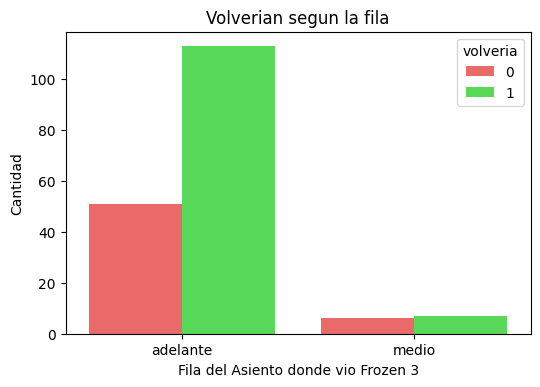

In [13]:
plt.figure(dpi=100)
sns.countplot(data=df, x='fila', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Fila del Asiento donde vio Frozen 3")
plt.title("Volverian segun la fila")

Ademas del gran cantidad de ausencia de información acerca de dicha variable, lo que vemos es que la gran mayoria que contesto dijo que lo hizo en filas de adelante, lo que en principio nos dificulta poder hacer una diferencia entre los dos valores que tenemos que nos pueda determinar concretamente una relacion entre el lugar donde se sento y la preferencia para volver.

Teniendo esto en cuenta, y que no podemos inferir un valor para reemplazar en las ausencias, vamos a proceder en descartar dicha columna de nuestros analisis.

In [14]:
df.drop(columns=['fila'],inplace=True)
df

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede,volveria
id_usuario,,,,,,,,,,
117,4d,Señor Camilo Pedro,hombre,73.5,0,0,59258;,1,fiumark_quilmes,0
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,fiumark_quilmes,0
794,normal,Señor Antonio Federico,hombre,NaN,0,0,"RE""39822",3,fiumark_chacarita,0
455,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,"C17""4:39",1,fiumark_palermo,0
173,4d,Señorita Rita Eudosia,mujer,4.0,1,1,569964,2,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...
448,normal,Señor Bernardo Melesio,hombre,37.0,0,0,3359;6,3,fiumark_palermo,1
636,3d,Señorita Lidia Catalina,mujer,31.0,0,0,45988:,2,fiumark_palermo,1
848,4d,Señor Arturo Antenor,hombre,38.0,0,0,56;435,1,fiumark_chacarita,0


## Analisis de la columna "Edad"

Reutilizaremos la función definida anteriomente para analizar la columna edad.

In [15]:
volveria_por_edad = df.groupby(by='edad').agg({
        "volveria" : porcentajeVolveria,       
})
volveria_por_edad

,volveria
edad,
3.42,100.000000
3.67,100.000000
3.75,100.000000
3.83,100.000000
4.00,71.428571
...,...
73.00,0.000000
73.50,0.000000
74.00,0.000000


En un primer analisis sobre las edades, podemos observar valores decimales lo cual genera demasiados valores posibles para dicha variable. Para poder optimizar los calculos, vamos a generar una categoría agrupando de a 10 años tomando su digito mas significativo. Ejemplo, todos aquellos que respondieron que tienen entre 20 y 30 años, estaran categorizados como 2.

In [16]:
def categorizarEdad(edad):
    if(np.isnan(edad)):
        return edad
    else:
        return int(round(edad/10,0))


df['edad_categorizada'] = df.edad.apply(categorizarEdad)
df

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede,volveria,edad_categorizada
id_usuario,,,,,,,,,,,
117,4d,Señor Camilo Pedro,hombre,73.5,0,0,59258;,1,fiumark_quilmes,0,7.0
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,fiumark_quilmes,0,4.0
794,normal,Señor Antonio Federico,hombre,NaN,0,0,"RE""39822",3,fiumark_chacarita,0,NaN
455,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,"C17""4:39",1,fiumark_palermo,0,NaN
173,4d,Señorita Rita Eudosia,mujer,4.0,1,1,569964,2,fiumark_palermo,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
448,normal,Señor Bernardo Melesio,hombre,37.0,0,0,3359;6,3,fiumark_palermo,1,4.0
636,3d,Señorita Lidia Catalina,mujer,31.0,0,0,45988:,2,fiumark_palermo,1,3.0
848,4d,Señor Arturo Antenor,hombre,38.0,0,0,56;435,1,fiumark_chacarita,0,4.0


Text(0.5, 1.0, 'Volverian segun categoria de edad')

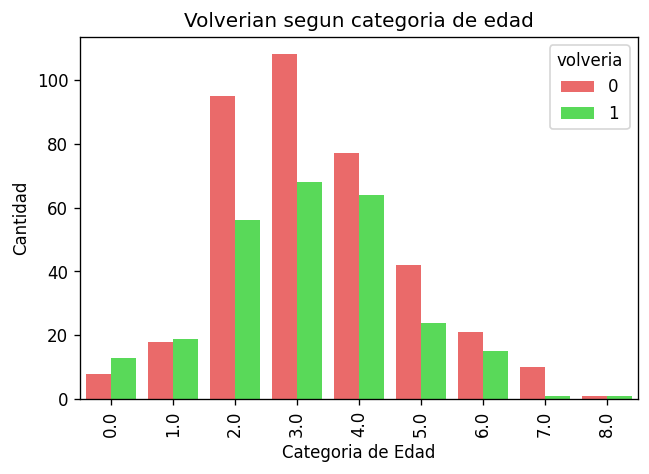

In [17]:
plt.figure(dpi=120)
sns.countplot(data=df, x='edad_categorizada', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xticks(rotation='vertical')
plt.xlabel("Categoria de Edad")
plt.title("Volverian segun categoria de edad")

El grafico anterior nos muestra que para personas con edad menor a 20 años, existe ciertos valores que podrian indicar una preferencia por volver. Sin embargo, de 20 años en adelante, en cada categoría la mayoria dice que no volveria. Esto tambien lo podemos observar obteniendo los porcentajes que volverian segun cada categoría.

In [18]:
df.groupby(by='edad_categorizada').agg({
        "volveria" : porcentajeVolveria
})

,volveria
edad_categorizada,
0.0,61.904762
1.0,51.351351
2.0,37.086093
3.0,38.636364
4.0,45.390071
5.0,36.363636
6.0,41.666667
7.0,9.090909
8.0,50.000000


## Analisis de la columna "Genero"

Para el analisis por genero, lo primero que trataremos de observa es si existe algun tipo de preferencia entre volver o no dependiendo del mismo.

Text(0.5, 1.0, 'Volverian segun el Genero')

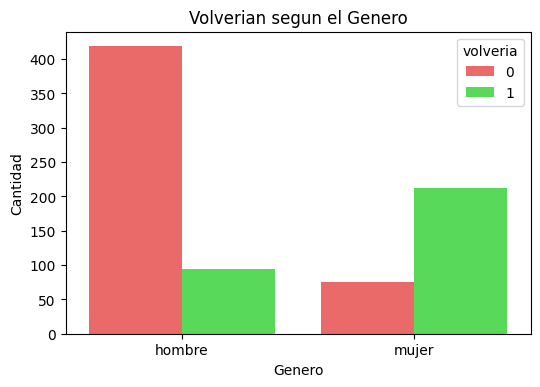

In [40]:
plt.figure(dpi=100)
sns.countplot(data=df, x='genero', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Genero")
plt.title("Volverian segun el Genero")

Como podemos observar, existe una relación muy fuerte entre el genero y las respuestas que dieron sobre si volverian o no, teniendo en los hombres una predeterminación a no volver y en las mujeres lo opuesto.

In [20]:
df.groupby(by='genero').agg({
        "volveria" : porcentajeVolveria
})

,volveria
genero,
hombre,18.323587
mujer,73.958333


Con estos ultimos datos, podemos ver que la tendencia de no regresar de los hombres es mas marcada que la de volver de las mujeres. Aún así, estos valores nos muestran una tendencia muy marcada para cada uno de los generos, lo que nos proporciona una buena variable para iniciar nuestra función de predicción.

## Analisis de la columna "Precio Ticket"

Como previamente hicimos, analizaremos a grande razgos la variable en un principio para ver si existe algun categoría de precio que debamos analizar en particular.

Text(0.5, 1.0, 'Volverian segun el precio del ticket')

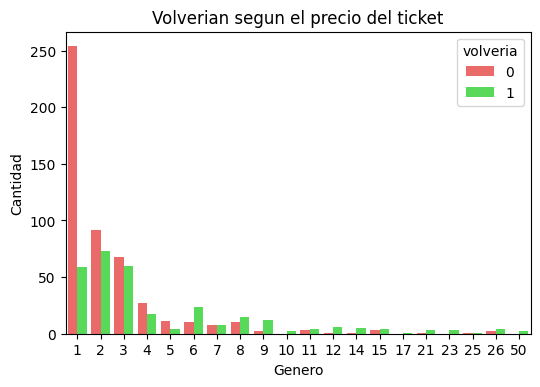

In [41]:
plt.figure(dpi=100)
sns.countplot(data=df, x='precio_ticket', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Genero")
plt.title("Volverian segun el precio del ticket")

Como podemos observar, para los que su precio de ticket fue categorizado como `1`, las respuestas negativas son muy altas en comparación con las respuestas positivas. Esto nos inclina a analizar en parte para todos aquellos que tuvieron esa categoria, en comparación con los que tuvieron otra categoria de precio.

In [42]:
df.groupby(by='precio_ticket').agg({
        "volveria" : porcentajeVolveria
})

,volveria
precio_ticket,
1,18.849840
2,44.242424
3,46.875000
4,38.636364
5,26.666667
6,70.588235
7,50.000000
8,60.000000
9,85.714286


## Correlación entre variables

A continuación vamos a tratar de analizar si existen algunas relaciones entre las variables. Para eso, trataremos de encontrar algun comportamiento que no se relacione con lo que ya fuimos observando para cada una de las mismas. Estas correlaciones nos ayudaran a generar las decisiones para nuestra función baseline.

### Genero en relación con el Precio del Ticket

Anteriormente observamos que las mujeres en su gran mayoría respondian que volverian mientras que los hombres lo opuesto. Por otro lado, pudimos observar que en cuanto al precio pagado por el ticket, aquellos que su ticket tuvo el valor categorizado como `1`, no solo son el grupo mayoritario, sino que ademas, la gran mayoría de estos respondio que no volveria.

En los analisis siguientes trataremos de encontrar si existe o no una relación entre las variables. Para ello, lo que haremos es separar por genero y segun si su precio de ticket corresponde a la categoría uno o no.

Text(0.5, 1.0, 'Volverian por Genero que tuvieron el precio de ticket 1')

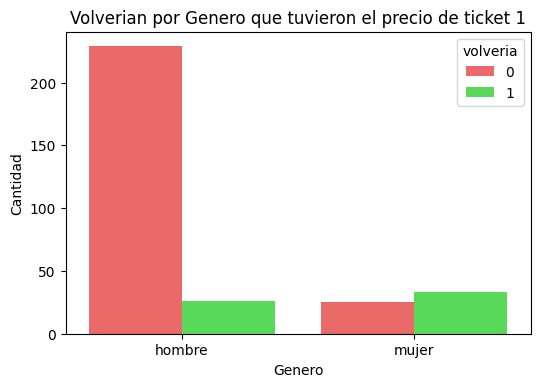

In [22]:
plt.figure(dpi=100)
sns.countplot(data=df[df['precio_ticket'] == 1 ], x='genero', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Genero")
plt.title("Volverian por Genero que tuvieron el precio de ticket 1")

Text(0.5, 1.0, 'Volverian por Genero que tuvieron otro precio de ticket que no fue el 1')

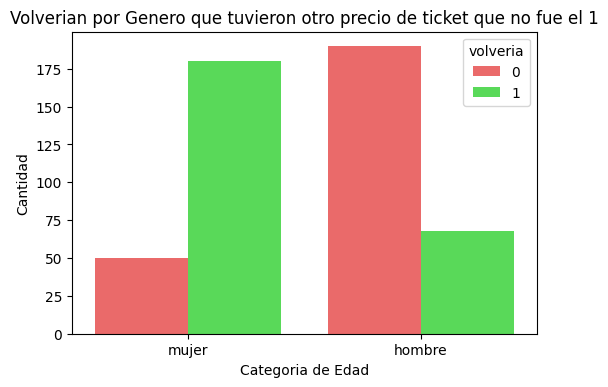

In [23]:
plt.figure(dpi=100)
sns.countplot(data=df[df['precio_ticket'] != 1 ], x='genero', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Categoria de Edad")
plt.title("Volverian por Genero que tuvieron otro precio de ticket que no fue el 1")

De estos graficos podemos observar que en todos los escenarios, las mujeres volverian mientras que los hombres no, independientemente de la si fueron categorizados en el precio que pagaron con el valor `1`. Es importante igual destacar, que el valor en las mujeres que volverian pagando dicha tarifa es mayor pero muy similar a las que no volverian. Esto nos habla de que el precio tuvo un impacto negativo, pero sin embargo, para la generación de nuestra función de predicción, no nos servira analizar el precio por sobre el genero.

### Genero en relación con el tipo de sala

Esta vez vamos a concentrarnos en si para algun tipo de sala, uno de los generos se comporta distinto a lo esperado, es decir, que las mujeres vuelvan en mayoria y que los hombres no lo hagan.

Text(0.5, 1.0, '¿Cual fue la respuesta para los hombres segun el tipo de sala?')

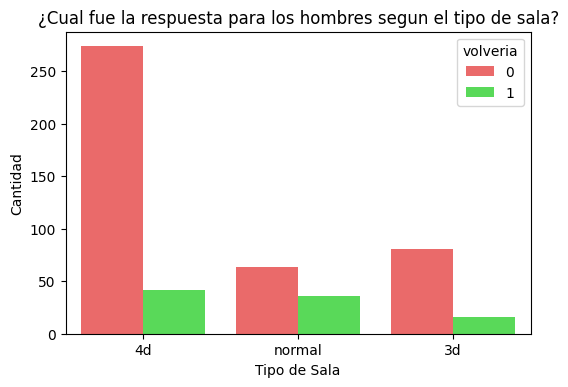

In [24]:
plt.figure(dpi=100)
sns.countplot(data=df[df['genero'] == 'hombre' ], x='tipo_de_sala', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para los hombres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para las mujeres segun el tipo de sala?')

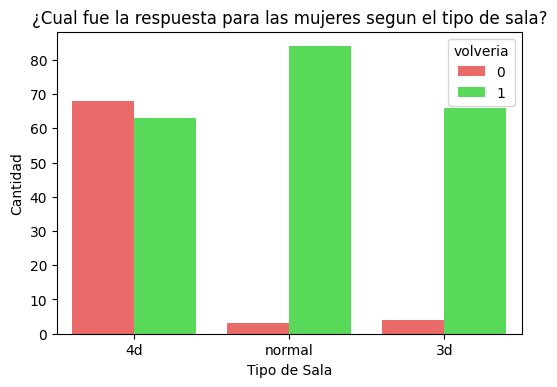

In [25]:
plt.figure(dpi=100)
sns.countplot(data=df[df['genero'] == 'mujer'], x='tipo_de_sala', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para las mujeres segun el tipo de sala?")

En el primer grafico no observamos ninguna diferencia con lo que veniamos viendo del analisis de cada variable, es decir, los hombres no volverian independientemente del tipo de sala. Sin embargo, en el segundo grafico encontramos un esceario particular. Las mujeres para las salas 4D en su mayoría responden que no volverian. Esto acaba de mejorar nuestra función de predicción ya que deberemos considerar este escenario particular para las mujeres.

Text(0.5, 1.0, '¿Cual fue la respuesta para los hombres segun el tipo de sala?')

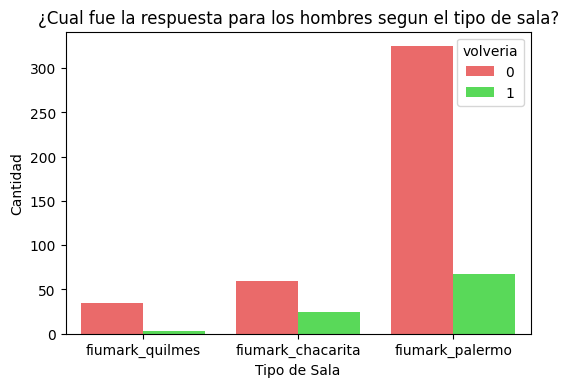

In [26]:
plt.figure(dpi=100)
sns.countplot(data=df[df['genero'] == 'hombre' ], x='nombre_sede', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para los hombres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para los hombres segun el tipo de sala?')

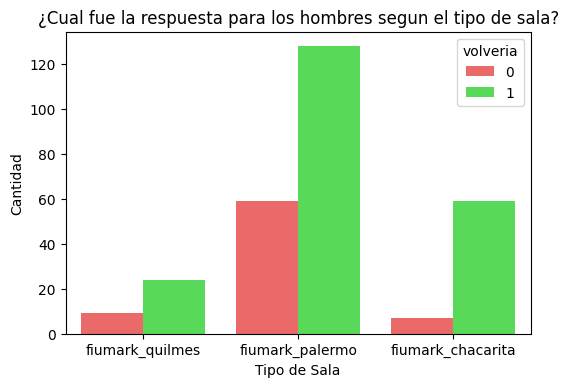

In [27]:
plt.figure(dpi=100)
sns.countplot(data=df[df['genero'] == 'mujer' ], x='nombre_sede', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para los hombres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para los hombres segun el tipo de sala?')

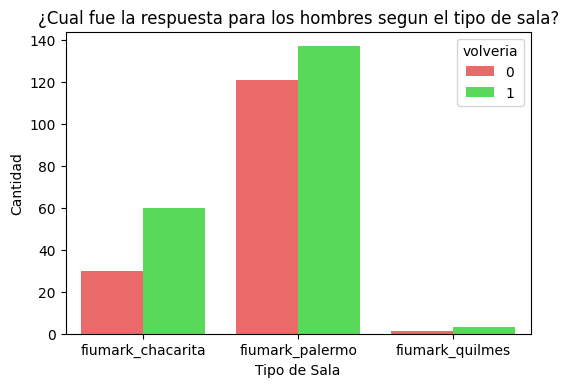

In [28]:
plt.figure(dpi=100)
sns.countplot(data=df[df['tipo_de_sala'] != '4d' ], x='nombre_sede', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para los hombres segun el tipo de sala?")

Text(0.5, 1.0, 'Cantidades segun la categoria de edad')

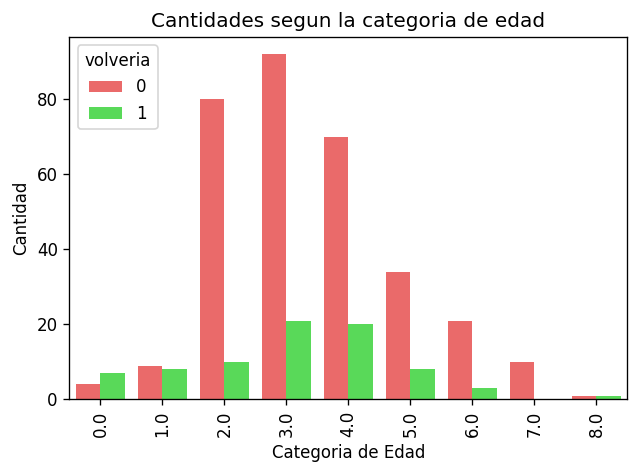

In [29]:
plt.figure(dpi=120)
data=df[df['genero'] == 'hombre' ]
sns.countplot(data=data, x='edad_categorizada', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xticks(rotation='vertical')
plt.xlabel("Categoria de Edad")
plt.title("Cantidades segun la categoria de edad")

Text(0.5, 1.0, 'Cantidades segun la categoria de edad')

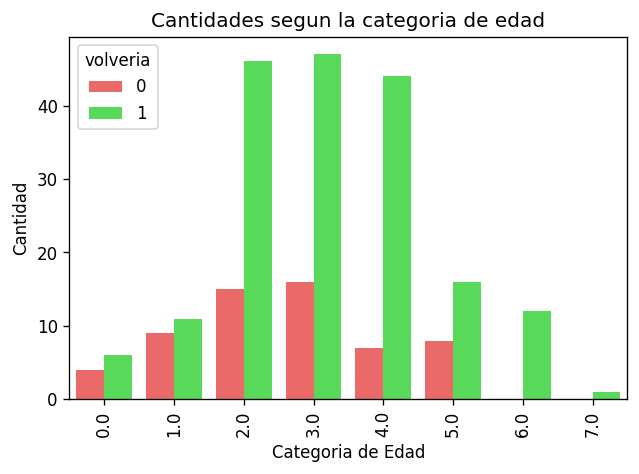

In [30]:
plt.figure(dpi=120)
data=df[df['genero'] == 'mujer' ]
sns.countplot(data=data, x='edad_categorizada', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xticks(rotation='vertical')
plt.xlabel("Categoria de Edad")
plt.title("Cantidades segun la categoria de edad")

# TODO: Explicar que para hombres la edad influencio en el valor de la decision. Habría que ver si 10 años es la cota, o si tenemos que agarrar un valor mayor.

Text(0.5, 1.0, 'Cantidades segun la categoria de edad')

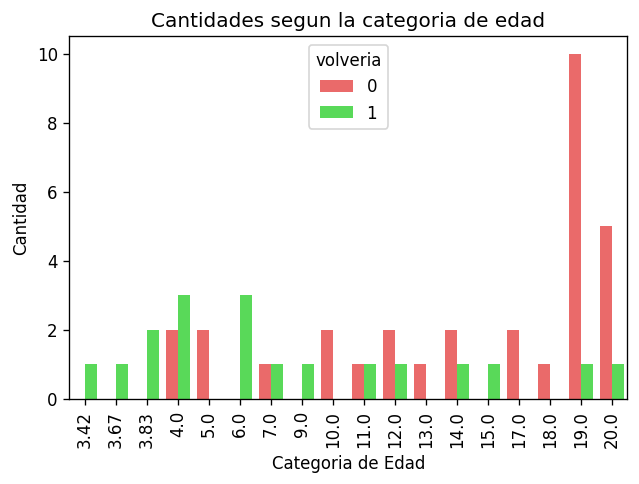

In [31]:
plt.figure(dpi=120)
data=df[(df['genero'] == 'hombre') & (df['edad'] <= 20.0 ) ]
sns.countplot(data=data, x='edad', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xticks(rotation='vertical')
plt.xlabel("Categoria de Edad")
plt.title("Cantidades segun la categoria de edad")

A continuación, nos interesa encontrar el punto de corte, para el cual existen mayores respuestas positivas que negativas.

In [32]:
values = {}
data=df[df['genero'] == 'hombre' ]
for x in range(20,4,-1):
    data=data[data['edad'] <= x ]
    data_volverian = data[data['volveria'] == 1 ]
    y = data_volverian.value_counts().sum() / data.value_counts().sum() * 100
    values[x] = y
values

{20: 36.734693877551024,
 19: 39.53488372093023,
 18: 50.0,
 17: 51.61290322580645,
 16: 55.172413793103445,
 15: 55.172413793103445,
 14: 53.57142857142857,
 13: 56.00000000000001,
 12: 58.333333333333336,
 11: 61.904761904761905,
 10: 63.1578947368421,
 9: 70.58823529411765,
 8: 68.75,
 7: 68.75,
 6: 71.42857142857143,
 5: 63.63636363636363}

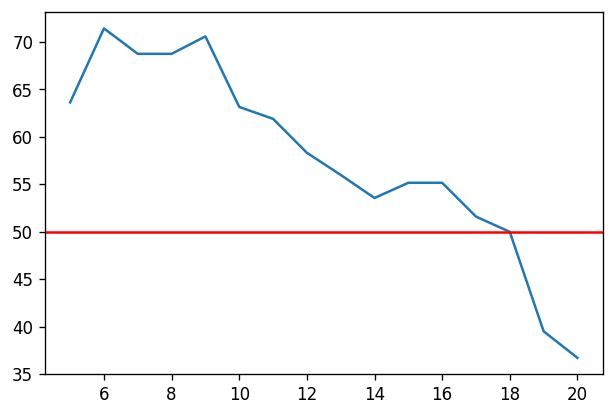

In [33]:
lists = sorted(values.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)
plt.figure(dpi=120)
plt.plot(x, y)
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

Como se puede observar, el punto de corte de acumulación es de 18 años. Esto quiere decir, que para todo hombre de que tenga menos de 18 años, tendra una tendencia positiva para volver

# Esta zona es correlacion de 3 variables
Por el momento no lo vamos a usar pero hizo ruido el precio segun la sala. No me cierran dos cosas:

    1. Que si el precio es "1" todas las salas dicen que no.
    2. Que 3d mujeres y precio > 1, da un valor muy similar que no se condice con el grafico mujeres y sala.

Text(0.5, 1.0, '¿Cual fue la respuesta para las mujeres segun el tipo de sala?')

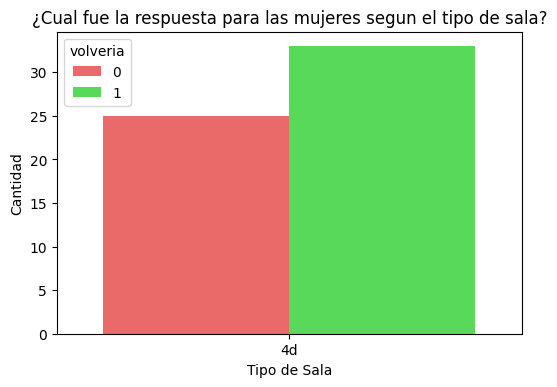

In [34]:
plt.figure(dpi=100)
data = df[ (df['genero'] == 'mujer') & (df['precio_ticket'] == 1)]
sns.countplot(data=data, x='tipo_de_sala', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para las mujeres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para las mujeres segun el tipo de sala?')

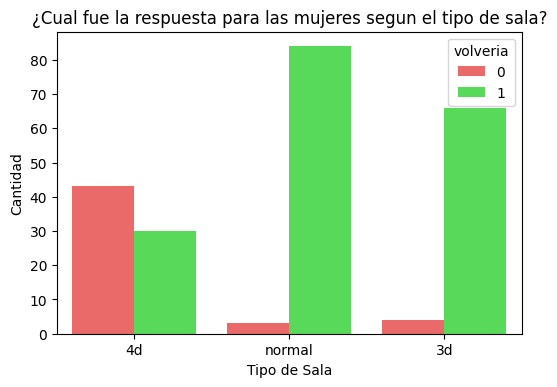

In [35]:
plt.figure(dpi=100)
data = df[ (df['genero'] == 'mujer') & (df['precio_ticket'] != 1)]
sns.countplot(data=data, x='tipo_de_sala', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para las mujeres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para las mujeres segun el tipo de sala?')

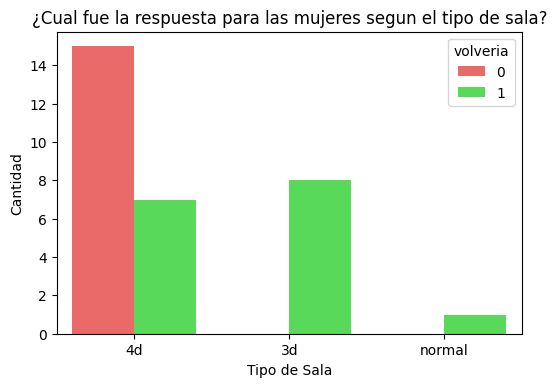

In [36]:
plt.figure(dpi=100)
data = df[ (df['genero'] == 'hombre') & (df['edad'] < 18)]
sns.countplot(data=data, x='tipo_de_sala', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para las mujeres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para las mujeres segun el tipo de sala?')

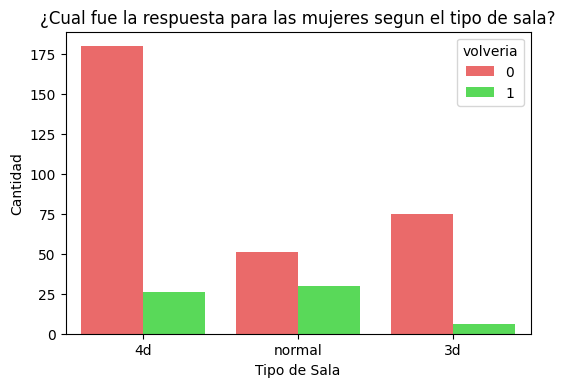

In [37]:
plt.figure(dpi=100)
data = df[ (df['genero'] == 'hombre') & (df['edad'] >= 18)]
sns.countplot(data=data, x='tipo_de_sala', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para las mujeres segun el tipo de sala?")

Text(0.5, 1.0, '¿Cual fue la respuesta para las mujeres segun el tipo de sala?')

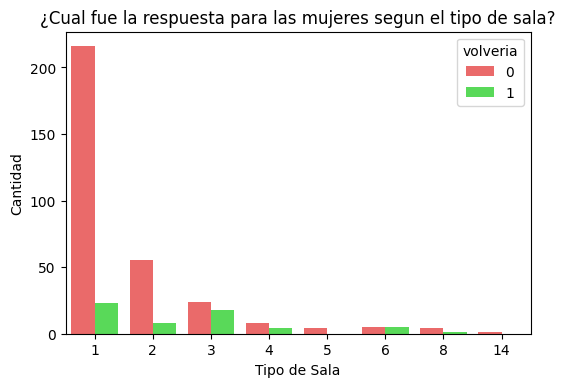

In [38]:
plt.figure(dpi=100)
data = df[ (df.amigos == 0) & (df.parientes == 0) & (df.genero == 'hombre')]
sns.countplot(data=data, x='precio_ticket', hue='volveria', palette={0: '#FF5555', 1: '#44EE44'},orient="vertical")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Sala")
plt.title("¿Cual fue la respuesta para las mujeres segun el tipo de sala?")

In [39]:
df_usuarioClean.isnull().sum()

NameError: name 'df_usuarioClean' is not defined

In [ ]:
df_usuarioClean.loc[df_usuarioClean.volveria == 1].count()

In [ ]:
df_usuarioClean.loc[(df_usuarioClean.edad > 25) & (df_usuarioClean.edad < 33) & (df_usuarioClean.volveria == 1)].count()

In [ ]:
df_usuarioClean.loc[(df_usuarioClean.edad > 25) & (df_usuarioClean.edad < 33)]

In [ ]:
df_quilmes = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_quilmes']
df_palermo = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_palermo']
df_chacarita = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_chacarita']
"""
#existen sedes sin nombre, entonces las elimino del data frame original para evitar inconsistencias.
df_usuarioClean.loc[ (df_usuarioClean.nombre_sede != 'fiumark_quilmes') & (df_usuarioClean.nombre_sede != 'fiumark_palermo') & (df_usuarioClean.nombre_sede != 'fiumark_chacarita')]

# al "plotear" el df me salen los nombres de labels principales por id y los borro del df
df_usuarioClean.drop(labels=[830,62], inplace=True)
"""

df_quilmes.loc[df_quilmes.volveria == 1].count() / df_quilmes.count()


In [ ]:
df_palermo.loc[df_palermo.volveria == 1].count() / df_palermo.count()

In [ ]:
df_chacarita.loc[df_chacarita.volveria == 1].count() / df_chacarita.count()

In [ ]:
df_usuarioClean[ ['nombre_sede'] ].value_counts().plot(kind='bar')

In [ ]:
def porcentajeVolveria(unAgrupamiento):
    return (unAgrupamiento == 1).mean() * 100.0

def porcentajeNOVolveria(unAgrupamiento):
    return (unAgrupamiento == 0).mean() * 100.0

df_agrupados_por_sede = df_usuarioClean.groupby(by='nombre_sede').agg(
    {
        "volveria" : porcentajeVolveria,
    }
)

df_agrupados_por_sede

In [ ]:
df_agrupados_por_sede.plot(kind = 'bar')

In [ ]:
df_agrupados_por_sede = df_usuarioClean.groupby('nombre_sede').agg(list)


arrayNumpy = df_agrupados_por_sede.to_numpy()
hola = np.array(arrayNumpy)


hola[0][1]

### Analizo otras variables que se me ocurren: Ir con amigos y/o familiares

In [ ]:
df_usuarioClean.loc[(df_usuarioClean.genero == 'mujer') & (df_usuarioClean.volveria == 0)]

### Agrupo entonces por Hombre y Mujer y ploteo los porcentajes de volver de cada genero.

In [ ]:
df_usuarios_porGenero = df_usuarioClean.groupby(by=['genero']).agg(
    {
        'volveria' : porcentajeVolveria
    }
)

#df_usuarios_porGenero['no volveria'] = df_usuarios_porGenero['volveria'].apply(porcentajeNOVolveria)

df_usuarios_porGenero['no volveria'] = df_usuarioClean.groupby(by=['genero']).agg(
    {
        'volveria' : porcentajeNOVolveria
    }
)

df_usuarios_porGenero

### Me fijo cuanta accuracy tenemos sin hacer ninguna partición

In [ ]:
from sklearn.metrics import accuracy_score

#observo que la mayoría no vuelve.
pred = [1] * len(df_usuarioClean)
accuracy_score(df_usuarioClean.volveria, pred)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2 , 4.8], dpi=100)

df_usuario_volvera = df_usuarioClean[ df_usuarioClean.volveria == 1 ]

df_usuario_no_volvera = df_usuarioClean[ df_usuarioClean.volveria == 0 ]

df_usuario_volvera.edad.plot(kind = 'hist', ax=axes[0], xlim=df_usuarioClean.edad.min())

df_usuario_no_volvera.edad.plot(kind = 'hist', ax=axes[1], xlim=df_usuarioClean.edad.min())

axes[0].set_title("edad - volverian")
axes[0].set_xlabel("edad")

axes[1].set_title("edad - no volverian")
axes[1].set_xlabel("edad")

plt.show()


In [ ]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='precio_ticket', hue='volveria')

plt.title("Cantidad por Precio de Ticket")import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='precio_ticket', hue='volveria')

plt.title("Cantidad por Precio de Ticket")

In [ ]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='tipo_de_sala', hue='volveria')

plt.title("Cantidad por Tipo de Sala")

In [ ]:
df_usuarioClean[(df_usuarioClean.nombre_sede == 'fiumark_palermo') & 
                (df_usuarioClean.tipo_de_sala == '4d') & 
                (df_usuarioClean.genero == 'hombre') & 
                (df_usuarioClean.volveria == 1)]

In [ ]:
df_usuarioClean[(df_usuarioClean.nombre_sede == 'fiumark_palermo') & 
                (df_usuarioClean.tipo_de_sala == '4d') & 
                (df_usuarioClean.genero == 'mujer') & 
                (df_usuarioClean.volveria == 1)]